In [5]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os, math
from functools import reduce
from PyEMD import EMD
import statsmodels.api as sm
%matplotlib inline

In [2]:
sample_rate = 25600
f_s = 35
pitch_diameter = 39.80  / 1000
ball_diameter = 7.92 / 1000
contact_angle = 0
n_balls = 8
filename = "./35Hz12kN/Bearing1_2/120.csv"
df = pd.read_csv(filename)
df = df.rename(columns={"Horizontal_vibration_signals":"H", "Vertical_vibration_signals":"V"})

In [3]:
# 计算轴承的基本参数

bpfo = n_balls * f_s / 2.0 * ( 1 + ball_diameter / pitch_diameter * math.cos(contact_angle))
bpfi = n_balls * f_s / 2.0 * ( 1 - ball_diameter /pitch_diameter * math.cos(contact_angle))
ftf = f_s / 2.0 * (1 - ball_diameter/pitch_diameter * math.cos(contact_angle))
bsf = pitch_diameter * f_s / ball_diameter * ( 1 - ((ball_diameter / pitch_diameter) * math.cos(contact_angle)) ** 2)

In [25]:
emd = EMD()
t = np.linspace(0, 1.28, len(df.V))
imfs = emd.emd(df.V.to_numpy(), t)
imf = imfs[0]

D:\tools\anaconda3\envs\dl\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


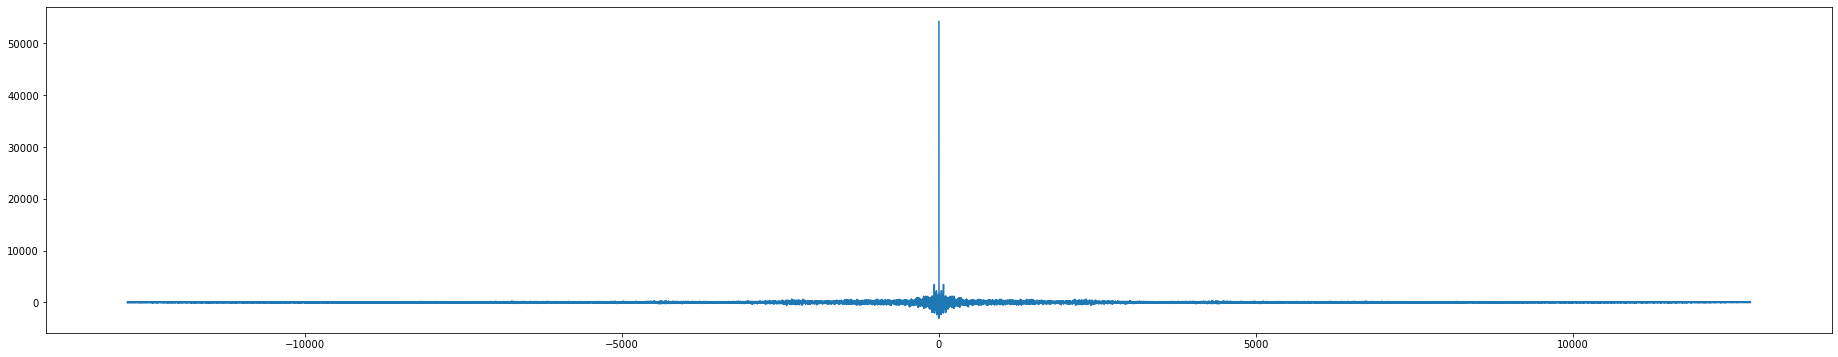

In [34]:
analytical_signal = sp.signal.hilbert(imf)
envelope = np.abs(analytical_signal)
envelope_fft = np.fft.fft(envelope)
envelope_fft -= np.mean(envelope_fft)
envelope_freq = np.fft.fftfreq(len(df.V), 1.0/sample_rate)
plt.figure(figsize=(32,6))
plt.plot(envelope_freq, envelope_fft)
plt.show()